In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [12]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 50
CHANNELS = 1

In [16]:
tf_df = tf.keras.preprocessing.image_dataset_from_directory(
        '/content/drive/MyDrive/aaa_tumour_classification/cropped/Training',
        shuffle=True,
        image_size = (IMAGE_SIZE,IMAGE_SIZE),
        batch_size = BATCH_SIZE,
        # color_mode="grayscale"
        )

Found 2870 files belonging to 4 classes.


In [6]:
class_names = tf_df.class_names
class_names

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [7]:
DF_LEN = len(tf_df)
DF_LEN

90

In [8]:
# for image_batch, label_batch in tf_df.take(1):
#     print(image_batch.shape)
#     print(label_batch.numpy())


(32, 256, 256, 3)
[1 2 3 0 0 0 1 3 1 3 3 3 2 1 3 1 2 3 3 3 3 0 2 0 3 3 0 0 3 3 0 1]


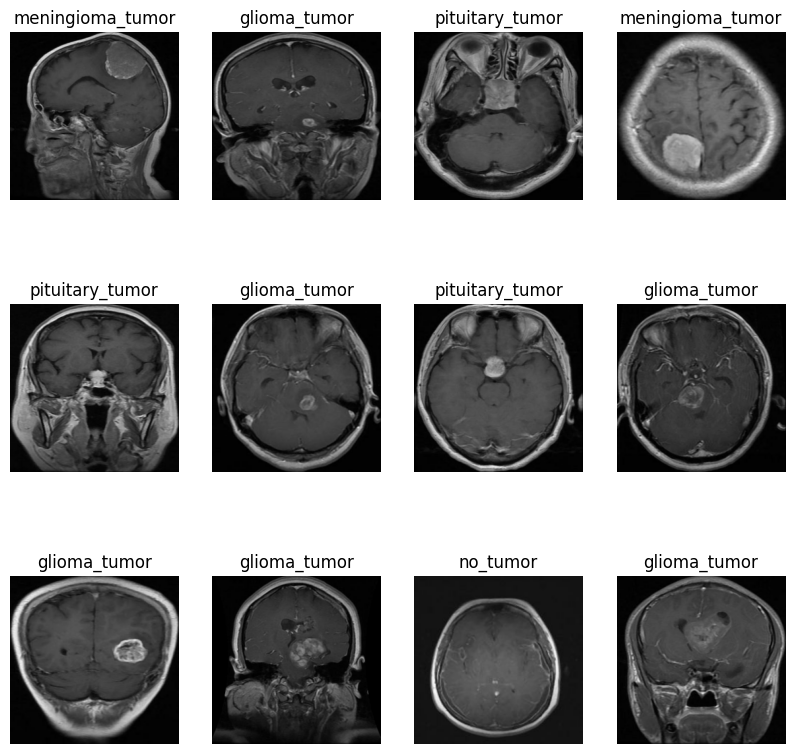

In [9]:
# plt.figure(figsize = (10,10))
# for image_batch, label_batch in tf_df.take(1):
#     for i in range(12):
#         plt.subplot(3,4,i+1)
#         plt.title(class_names[label_batch[i]])
#         plt.imshow(image_batch[i].numpy().astype('uint8'))
#         plt.axis('off')

In [17]:
def get_partitions(df,train_split = 0.80,test_split = 0.10,val_split = 0.10,
                  shuffle = True,shuffle_size = 10000):

    df_len = len(df)

    if shuffle :
        df = df.shuffle(buffer_size = shuffle_size,seed = 41)

    train_size = int(df_len * train_split)
    val_size = int(df_len * val_split)

    train_df = df.take(train_size)
    val_df = df.skip(train_size).take(val_size)
    test_df = df.skip(train_size).skip(val_size)

    return train_df,val_df,test_df


# lets say you have 10 images
# 5 goes for train_df
# 3 goes for val_df by skipping the first 5  and taking the next 3
# 2 goes for test_df by skipping the first 5 and skipping the next 3 and take the remaining

In [18]:
train_df, val_df, test_df = get_partitions(tf_df)

In [19]:
len(train_df), len(val_df),len(test_df)

(72, 9, 9)

In [14]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)

])
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.20)
])

In [20]:
for image_batch, label_batch in tf_df.take(1):
    print(image_batch.shape)

# (32, 256, 256, 3)
# this will be the input shape that we will feed into the CNN

(32, 256, 256, 3)


In [22]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
n_classes = 4

model = models.Sequential([
    # resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [23]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 64)       

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_df,
    batch_size=BATCH_SIZE,
    validation_data=val_df,
    verbose=1,
    epochs=30,
)

Epoch 1/30
72/72 [==============================] - 49s 202ms/step - loss: 1.5816 - accuracy: 0.3776 - val_loss: 1.1769 - val_accuracy: 0.4792
Epoch 2/30
72/72 [==============================] - 25s 228ms/step - loss: 1.0121 - accuracy: 0.5610 - val_loss: 0.8143 - val_accuracy: 0.6528
Epoch 3/30
72/72 [==============================] - 23s 192ms/step - loss: 0.8217 - accuracy: 0.6589 - val_loss: 0.6339 - val_accuracy: 0.7778
Epoch 4/30
72/72 [==============================] - 24s 194ms/step - loss: 0.5987 - accuracy: 0.7629 - val_loss: 0.5812 - val_accuracy: 0.7812
Epoch 5/30
72/72 [==============================] - 23s 201ms/step - loss: 0.5308 - accuracy: 0.7825 - val_loss: 0.3709 - val_accuracy: 0.8681
Epoch 6/30
72/72 [==============================] - 24s 204ms/step - loss: 0.3971 - accuracy: 0.8426 - val_loss: 0.5322 - val_accuracy: 0.7950
Epoch 7/30
72/72 [==============================] - 23s 193ms/step - loss: 0.3675 - accuracy: 0.8589 - val_loss: 0.2969 - val_accuracy: 0.8854

In [26]:
scores = model.evaluate(test_df)


9/9 [==============================] - 10s 27ms/step - loss: 0.0100 - accuracy: 0.9965


In [27]:
scores

[0.009981571696698666, 0.9965277910232544]

In [28]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

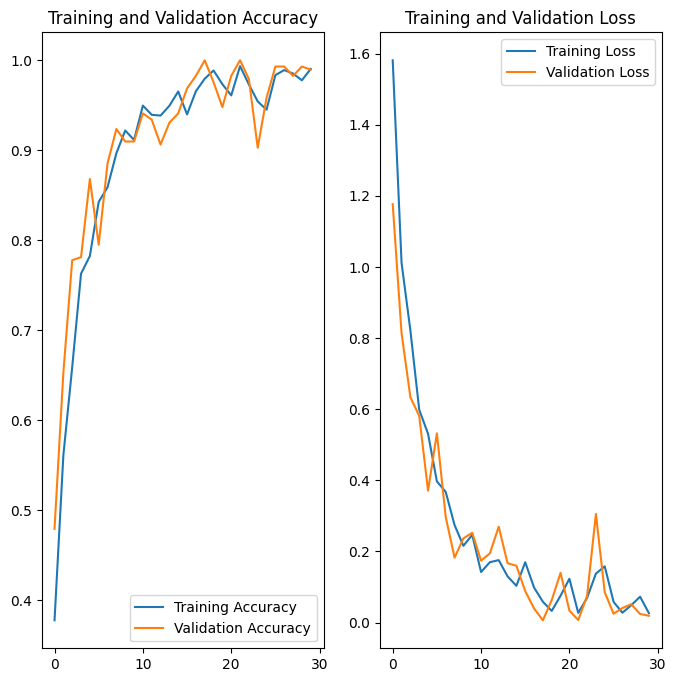

In [30]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: meningioma_tumor
1/1 [==============================] - 0s 301ms/step
predicted label: meningioma_tumor


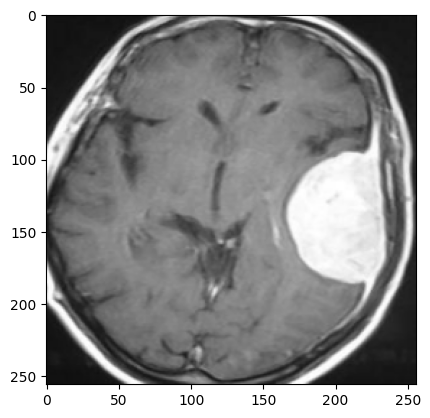

In [31]:
import numpy as np
for images_batch, labels_batch in test_df.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [33]:

model.save("/content/drive/MyDrive/aaa_brain_tumour_models/brain_tumour_classifier_99acc.h5")

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


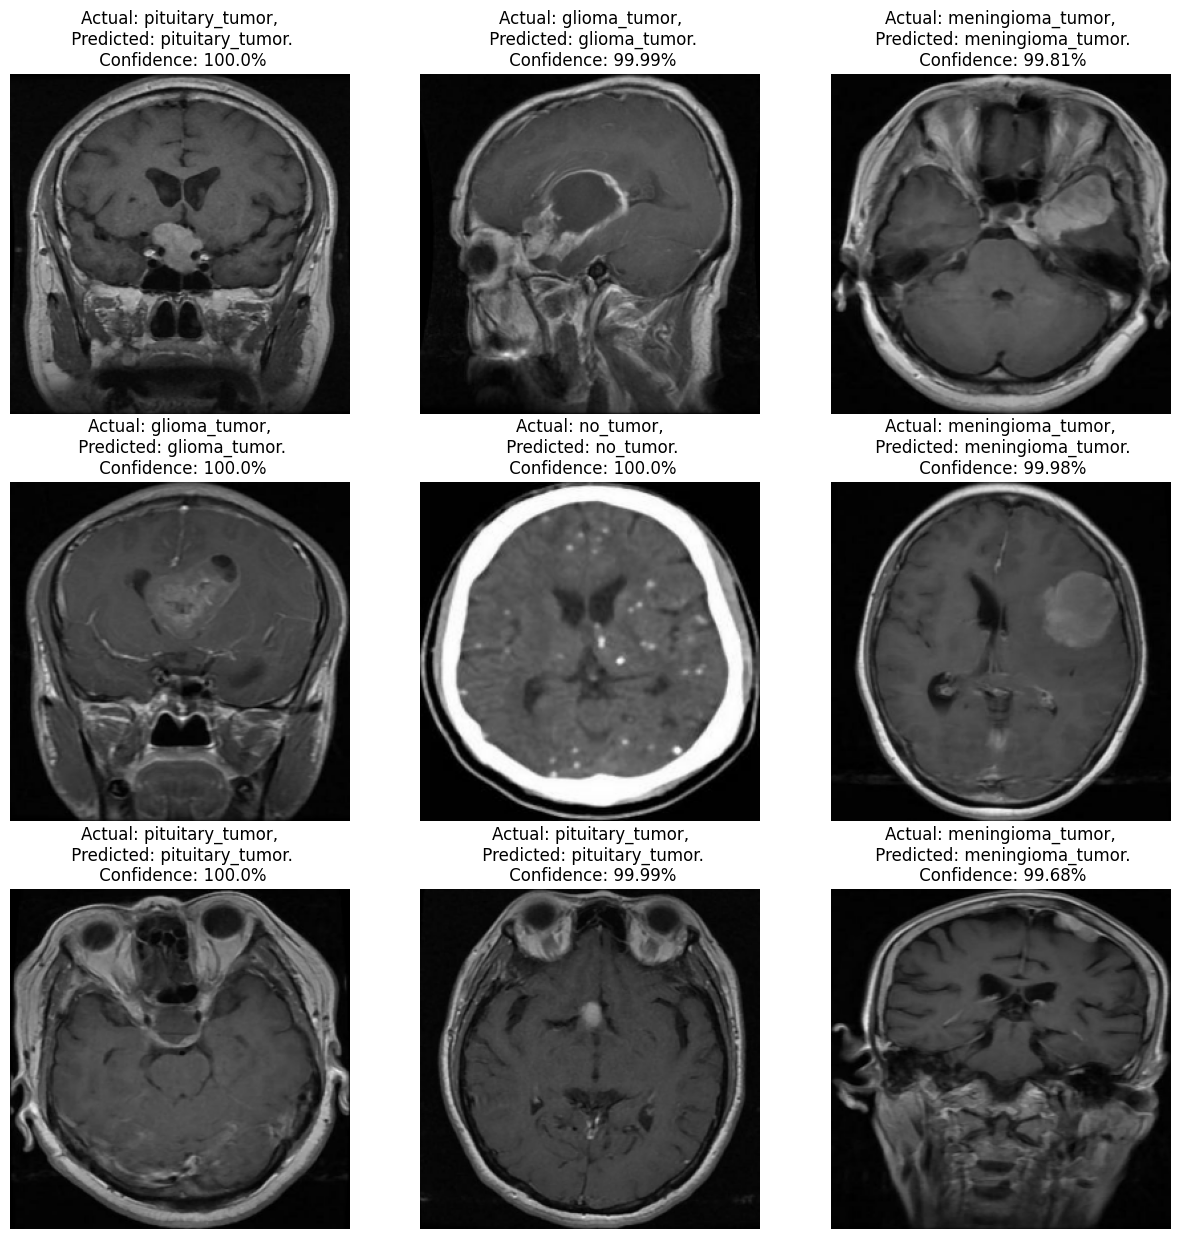

In [35]:
plt.figure(figsize=(15, 15))
for images, labels in test_df.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [36]:
import os
model_version=max([int(i) for i in os.listdir("/content/drive/MyDrive/models") + [0]])+1
model.save(f"/content/drive/MyDrive/models/{model_version}")

model.save(f"/content/drive/MyDrive/models/{model_version}/model {model_version}.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
